## Zadanie domowe: adaptacyjna filtracja medianowa

Wszystkie omówione i przetestowane powyżej filtry działały w ten sam sposób dla każdego piksela obrazu.
Natomiast przy filtracji adaptacyjnej następuje zmiana parametrów filtru w zależności od statystycznych charakterystyk otoczenia rozpatrywanego piksela.

Omówiony poprzednio filtr medianowy dobrze eliminuje zakłócenia impulsowe o niewielkiej gęstości przestrzennej (mniej niż 20% w pionie i poziomie). 
W zadaniu filtracji bardziej zakłóconych obrazów lepiej sprawdza się **adaptacyjny filtr medianowy**.  
"Adaptacyjność" filtra polega na zmianie rozmiaru okna w trakcie filtracji w zależności od pewnych warunków.

Przyjmijmy następujące oznaczenia:
- $z_{min}$ - najmniejsza jasność w oknie $S_{xy}$,
- $z_{max}$ - największa jasność w oknie $S_{xy}$,
- $z_{med}$ - mediana z jasności w oknie $S_{xy}$,
- $z_{xy}$  - jasność w punkcie o współrzędnych $(x, y)$,
- $S_{max}$ - maksymalny dozwolony rozmiar okna $S_{xy}$.

Algorytm można opisać następującym pseudokodem:
<div style="background-color:rgba(0, 0, 0, 0.0470588); padding:10px 0;font-family:monospace;">
Faza A:<br>	
&nbsp;&nbsp;&nbsp;<b>if</b>  $z_{max}$ > $z_{med}$ > $z_{min}$ <b>then</b> <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; przejdź do fazy B<br>
&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwiększ rozmiar okna<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>if</b> rozmiar okna <= $S_{max}$ <b>then</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; powtórz fazę A<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwróć $z_{med}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<b>end if</b><br>
&nbsp;&nbsp;&nbsp;<b>end if</b><br><br>

Faza B:<br>
&nbsp;&nbsp;&nbsp;<b>if</b>  $z_{max}$ > $z_{xy}$ > $z_{min}$ <b>then</b>  <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; zwróć  $z_{xy}$ <br>
&nbsp;&nbsp;&nbsp;<b>else</b><br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;zwróć $z_{med}$<br>
&nbsp;&nbsp;&nbsp;<b>end if</b><br>
</div>

### Wyjaśnienie działania

Cały czas należy pamiętać, jakie są cele działania filtru:
- usunięcie zakłóceń typu *pieprz i sól* (ang. _salt and pepper_ noise),
- wygładzenie innego rodzaju zakłóceń,
- redukcja zniekształceń (pogrubianie albo pocienianie krawędzi).

Wartości $z_{min}$ i $z_{max}$ uważa się za zakłócenia impulsowe w danym oknie, nawet jeżeli nie są to odpowiednio najmniejsza i największa wartość w całym obrazie.

Celem fazy A jest określenie, czy rezultat filtracji medianowej $z_{med}$ jest zakłóceniem impulsowym czy nie. 
Jeżeli spełniona jest nierówność $z_{min}$ < $z_{med}$ < $z_{max}$, to wartość $z_{med}$ nie może być zakłóceniem impulsowym. 
W takim przypadku przechodzimy do fazy B i sprawdzamy, czy piksel $z_{xy}$ jest zakłóceniem impulsowym. 
Jeżeli spełniona jest nierówność $z_{min}$ < $z_{xy}$ < $z_{max}$, to $z_{xy}$ nie może być zakłóceniem impulsowym. 
W takim przypadku algorytm zwraca niezmienioną wartość $z_{xy}$ - w ten sposób zmniejsza się zniekształcenia.
Jeżeli nierówność $z_{min}$ < $z_{xy}$ < $z_{max}$ nie jest spełniona, oznacza to, że albo $z_{xy}$ = $z_{min}$, albo $z_{xy}$ = $z_{max}$. 
W obu przypadkach uznaje się, że wartość $z_{xy}$ jest zakłóceniem i jako wynik filtracji zwraca się wartość $z_{med}$, o której na podstawie fazy A wiadomo, że nie jest zakłóceniem.

Przypuśćmy, że nie została spełniona nierówność $z_{min}$ < $z_{med}$ < $z_{max}$, algorytm wtedy zwiększa rozmiar okna i powtórnie wykonuje fazę A. 
Dzieje się tak aż do momentu, kiedy algorytm znajdzie medianę, która nie jest zakłóceniem impulsowym albo osiągnięty zostanie maksymalny rozmiar okna. 
W przypadku, gdy osiągnięty zostanie maksymalny rozmiar okna, algorytm zwraca wartość $z_{med}$. 
Nie ma gwarancji, że wartość ta nie jest zakłóceniem impulsowym, jednakże odpowiedni dobór maksymalnego rozmiaru okna pozwala zminimalizować prawdopodobieństwo wystąpienia takiej sytuacji.

Po wyznaczeniu wartości po filtracji dla danego piksela, okno filtru się przemieszcza, a algorytm uruchamiany jest dla nowej lokalizacji z parametrami początkowymi.

### Zadanie - zaimplementować opisaną powyżej metodę.

1. Wczytaj obraz _plytkaSzumImp.png_. Wyświetl go.

2. Przefiltruj obraz filtrem medianowym o rozmiarze okna $5 \times 5$. Wynik filtracji wyświetl.

3. Zaimplementuj opisany adaptacyjny filtr medianowy. Wskazówki:
- należy przyjąć maksymalny rozmiar okna na $7 \times 7$, a początkowy na $3 \times 3$. Zakładamy, że rozmiar filtra powinien być nieparzysty,
- obliczenia trzeba wykonać w dwóch pętlach `for` (odwiedzić każdy piksel) - dla ułatwienia zaleca się pominięcie pikseli brzegowych (jeżeli maksymalny rozmiar okna wynosi $7 \times 7$, to nie należy dokonywać obliczeń dla 3 pikseli brzegowych),
- w każdej iteracji należy:
    - przywrócić początkowy rozmiar okna ($3 \times 3$),
    - "wyciąć" otoczenie (parametr opisujący rozmiar otoczenia należy "uzmiennić"),
    - obliczyć parametry: $z_{min}$, $z_{max}$, $z_{med}$ (metody wycinka: `min`, `max` i funkcja `np.median`). 

- wykonać opisany algorytm. Uwaga - obliczenia mogą się chwilkę wykonywać.

4. Porównaj rezultaty filtracji medianowej i adaptacyjnej.

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'
fileNames = ["plytkaSzumImp.png"]

for fileName in fileNames:
    if not os.path.exists(fileName):
        r = requests.get(url + fileName, allow_redirects = True)
        open(fileName, 'wb').write(r.content)

(np.float64(-0.5), np.float64(454.5), np.float64(439.5), np.float64(-0.5))

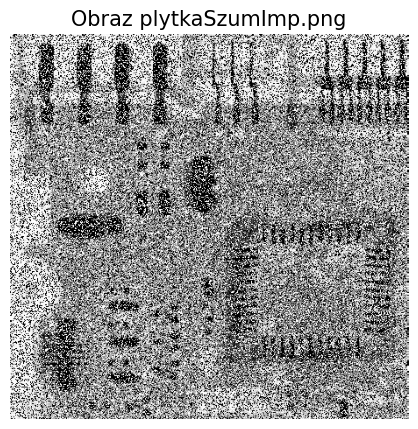

In [2]:
plytkaSzumImp = cv2.imread('plytkaSzumImp.png')
plytkaSzumImp = cv2.cvtColor(plytkaSzumImp, cv2.COLOR_BGR2GRAY)

plt.rcParams["figure.figsize"] = (10, 5)
plt.title("Obraz plytkaSzumImp.png", fontsize = 15)
plt.imshow(plytkaSzumImp, 'gray', vmin = 0, vmax = 256)
plt.axis('off')

(np.float64(-0.5), np.float64(454.5), np.float64(439.5), np.float64(-0.5))

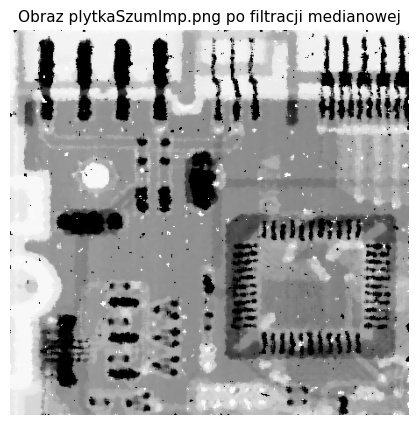

In [3]:
plytkaSzumImp_filtered = np.zeros_like(plytkaSzumImp)
cv2.medianBlur(src = plytkaSzumImp, dst = plytkaSzumImp_filtered, ksize = 5)

plt.title("Obraz plytkaSzumImp.png po filtracji medianowej", fontsize = 11)
plt.imshow(plytkaSzumImp_filtered, 'gray', vmin = 0, vmax = 256)
plt.axis('off')

In [4]:
# adaptacyjny filtr medianowy
def adaptive_median_filter(image):
    (X, Y) = image.shape
    max_size = 7
    base_size = 3
    output_image = np.zeros_like(image)
    
    for x in range(max_size // 2, X - max_size // 2):
        for y in range(max_size // 2, Y - max_size // 2):
            median = phaseA(image, x, y, base_size, max_size)
            output_image[x, y] = median
            
    return output_image  

# funkcja pomocnicza - faza A
def phaseA(image, x, y, kernel_size, max_size):
    while True:
        window = image[x - kernel_size // 2 : x + 1 + kernel_size // 2, y - kernel_size // 2 : y + 1 + kernel_size // 2]
        zmin = window.min()
        zmax = window.max()
        zmed = np.median(window)
        
        if zmax > zmed > zmin:
            return phaseB(zmax, zmed, zmin, image[x, y])
    
        kernel_size += 2
        if kernel_size <= max_size:
            continue
            
        return zmed
                
# funkcja pomocnicza - faza B
def phaseB(zmax, zmed, zmin, zxy):
    if zmax > zxy > zmin:
        return zxy
    return zmed

In [5]:
# pomocnicza funkcja do porównania filtracji medianowych
def compare_median_filters(image, filtered1, filtered2, image_name):
    fig, axs = plt.subplots(1, 3)
    fig.set_size_inches(18, 6)
    fig.suptitle("Wspólny wykres oryginalnego obrazka i obrazków po filtracji medianowej: zwykłej i adaptacyjnej", fontsize = 15)
    
    axs[0].imshow(image, 'gray', vmin = 0, vmax = 255)
    axs[0].set_title(f"Oryginalny obrazek {image_name}")
    axs[0].axis('off')
    
    axs[1].imshow(filtered1, 'gray', vmin = 0, vmax = 255)
    axs[1].set_title("Obraz po filtracji medianowej zwykłej")
    axs[1].axis('off')
    
    axs[2].imshow(filtered2, 'gray', vmin = 0, vmax = 255)
    axs[2].set_title("Obraz po filtracji medianowej adaptacyjnej")
    axs[2].axis('off')

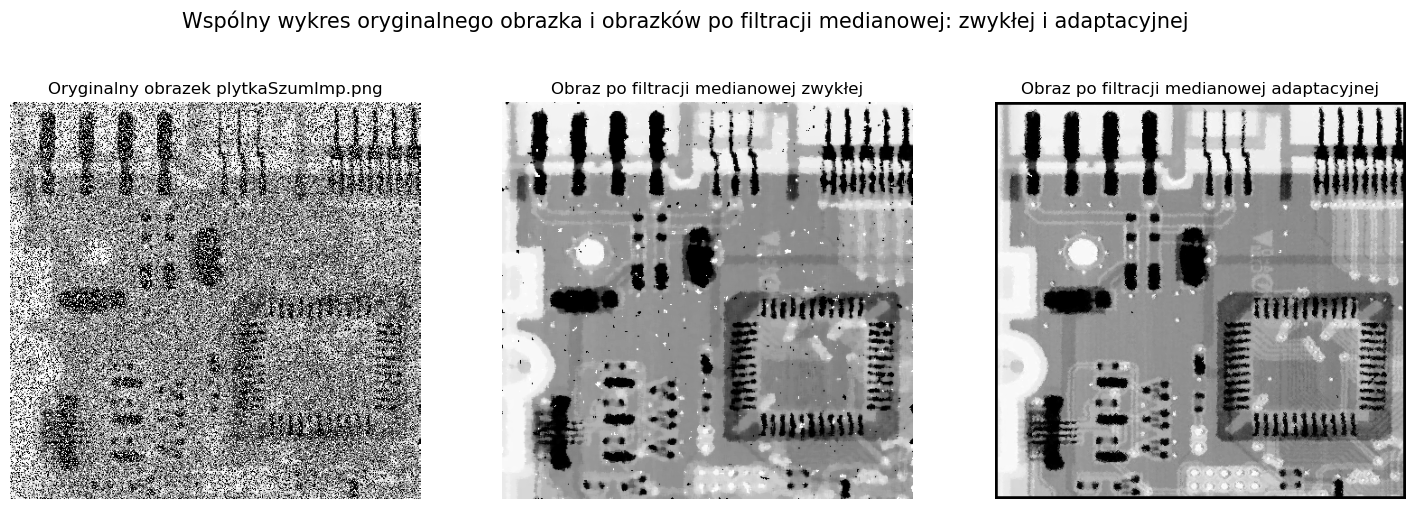

In [6]:
plytkaSzumImp_filtered1 = np.zeros_like(plytkaSzumImp)
cv2.medianBlur(src = plytkaSzumImp, dst = plytkaSzumImp_filtered1, ksize = 5)

plytkaSzumImp_filtered2 = adaptive_median_filter(plytkaSzumImp)
compare_median_filters(plytkaSzumImp, plytkaSzumImp_filtered1, plytkaSzumImp_filtered2, "plytkaSzumImp.png")

Aby zobaczyć miejsca, gdzie są różnice, wyświetlę jeszcze moduł z różnicy pomiędzy przefiltrowanymi obrazkami.

(np.float64(-0.5), np.float64(454.5), np.float64(439.5), np.float64(-0.5))

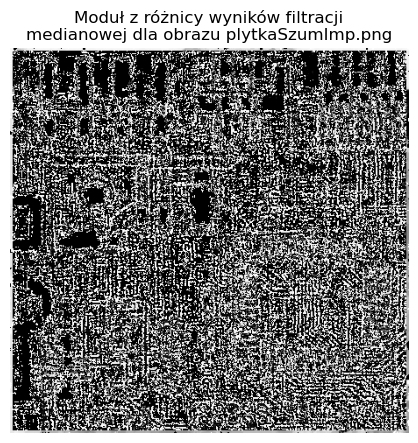

In [7]:
diff_abs = np.abs(plytkaSzumImp_filtered1 - plytkaSzumImp_filtered2)
    
plt.title("Moduł z różnicy wyników filtracji\nmedianowej dla obrazu plytkaSzumImp.png")
plt.imshow(diff_abs, 'gray', vmin = 0, vmax = 256)
plt.axis('off')